In [1]:
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

%matplotlib widget

In [2]:
figsize_global = (8, 5)

In [3]:
def plot_openmp(foldername, title):
    dfplot = pd.DataFrame(columns=[title, '# Threads'])

    for num_threads in range(2, 9):
        df = pd.read_csv("../results/openmpresults/" + foldername + "/cleaned-omp-example-" + str(num_threads) + "t-log.out") 
        print("Median for num_threads " + str(num_threads) + " is " + str(df['Time'].mean()*10))
        dfplot = dfplot.append({'Mean times': df['Time'].mean()*10, '# Threads': num_threads}, ignore_index=True)
        
    dfplot.plot(x='# Threads', y='Mean times', grid=True, figsize=figsize_global, ylabel="Mean Barrier Time (nano sec)", title=title)
    

In [4]:
def plot_mpi(foldername, title):
    dfplot = pd.DataFrame(columns=[title, '# Threads'])

    for num_processes in range(2, 13, 2):
        df = pd.read_csv("../results/mpiresults/" + foldername + "/cleaned-mpi-example-" + str(num_processes) + "p-log.out") 
        print("Median for num_processes " + str(num_processes) + " is " + str(df['Time'].mean()*10))
        dfplot = dfplot.append({'Mean times': df['Time'].mean()*10, '# Threads': num_processes}, ignore_index=True)
        
    dfplot.plot(x='# Threads', y='Mean times', grid=True, figsize=figsize_global, \
                xlabel="# Processes", ylabel="Mean Barrier Time (nano sec)", title=title)
    

In [5]:
openmp_mappings = [
    ["baseline_outputs", "Baseline"],
    ["sense_reversal_outputs", "Sense Reversal"],
    ["disseminatoin_outputs", "Dissemination"]
]

In [6]:
mpi_mappings = [
    ["baseline", "Baseline"],
    ["mcs", "MCS"],
    ["dissemination", "Dissemination"]
]

Baseline
Median for num_threads 2 is 209.5
Median for num_threads 3 is 488.33333333333337
Median for num_threads 4 is 714.0
Median for num_threads 5 is 888.6000000000001
Median for num_threads 6 is 1067.6666666666667
Median for num_threads 7 is 1393.5714285714287
Median for num_threads 8 is 1460.8749999999998
Sense Reversal
Median for num_threads 2 is 306.5
Median for num_threads 3 is 435.33333333333337
Median for num_threads 4 is 689.75
Median for num_threads 5 is 834.8000000000001
Median for num_threads 6 is 1026.0
Median for num_threads 7 is 1180.142857142857
Median for num_threads 8 is 1386.75
Dissemination
Median for num_threads 2 is 323.0
Median for num_threads 3 is 508.00000000000006
Median for num_threads 4 is 685.75
Median for num_threads 5 is 883.6
Median for num_threads 6 is 1095.3333333333335
Median for num_threads 7 is 1390.4285714285716
Median for num_threads 8 is 1477.75


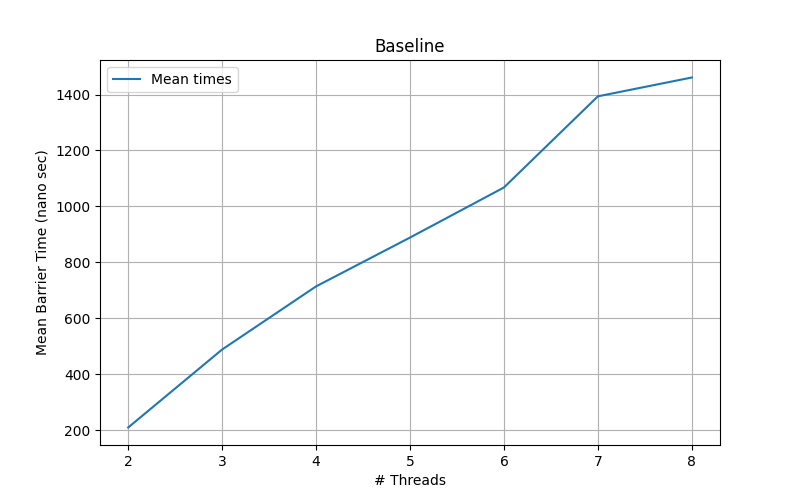

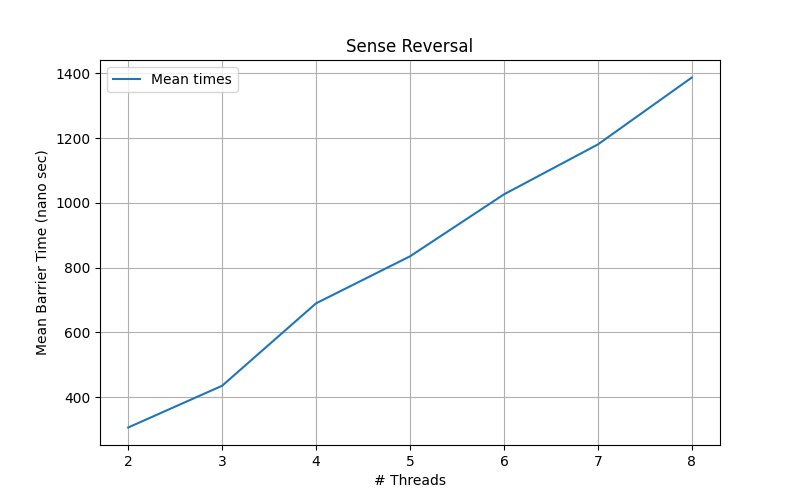

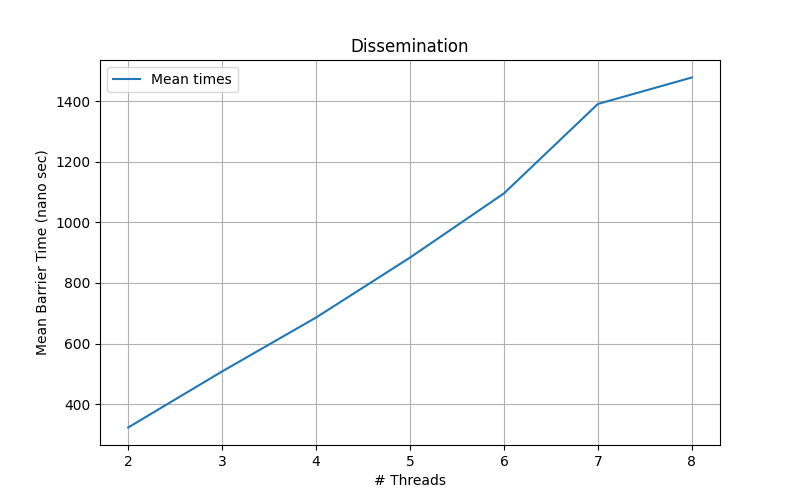

In [7]:
for [foldername, title] in openmp_mappings:
    print(title)
    plot_openmp(foldername, title)

Baseline
Median for num_processes 2 is 371.5
Median for num_processes 4 is 613.5
Median for num_processes 6 is 848.5
Median for num_processes 8 is 829.875
Median for num_processes 10 is 1074.7
Median for num_processes 12 is 1265.25
MCS
Median for num_processes 2 is 513.5
Median for num_processes 4 is 891.9999999999999
Median for num_processes 6 is 1718.166666666667
Median for num_processes 8 is 2151.5
Median for num_processes 10 is 2484.3
Median for num_processes 12 is 2669.8333333333335
Dissemination
Median for num_processes 2 is 337.5
Median for num_processes 4 is 621.5
Median for num_processes 6 is 907.3333333333334
Median for num_processes 8 is 903.125
Median for num_processes 10 is 1220.2
Median for num_processes 12 is 1365.25


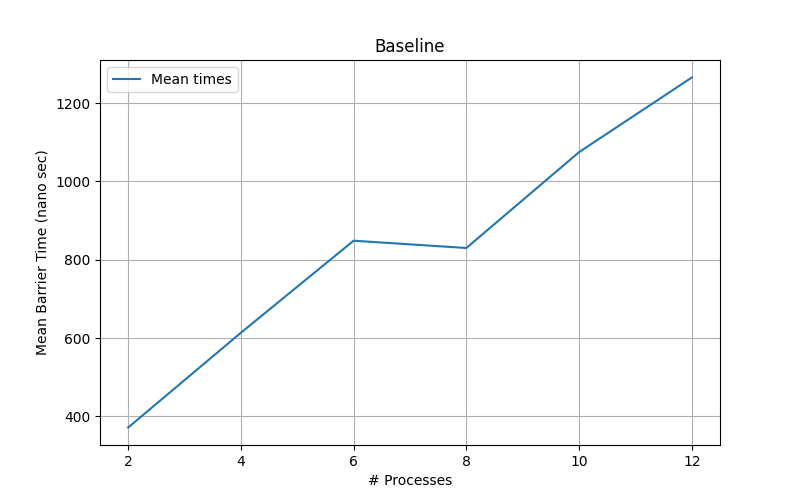

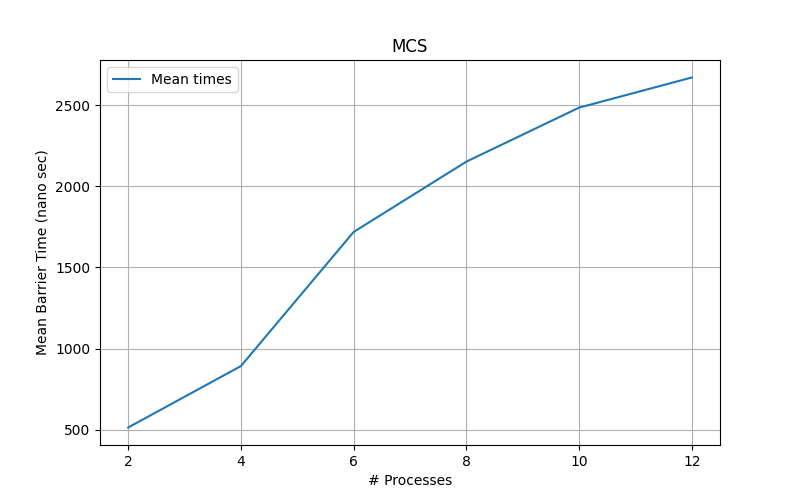

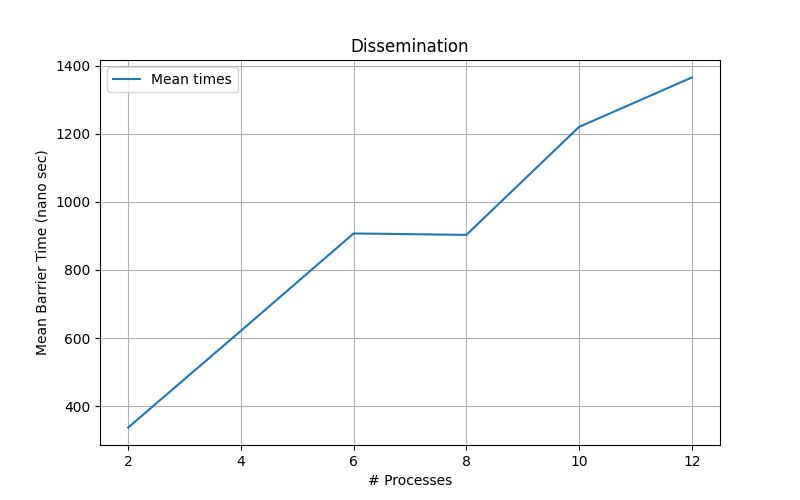

In [8]:
for [foldername, title] in mpi_mappings:
    print(title)
    plot_mpi(foldername, title)
    

In [9]:
def plot_openmp_all():
    result = None
    for [foldername, title] in openmp_mappings:
        df = pd.DataFrame()
        for num_threads in range(2, 9):
            dftemp = pd.read_csv("../results/openmpresults/" + foldername + "/cleaned-omp-example-" + str(num_threads) + "t-log.out") 
            df = df.append({title: dftemp['Time'].mean()*10, '# Threads': num_threads}, ignore_index=True)
        # result = pd.concat([result, df], axis = 1, join="outer")
        
        if result is None:
            result = df
        else:
            result = result.join(df[title])
        # print(result)
    result.plot(x='# Threads', grid=True, figsize=figsize_global, ylabel="Mean Barrier Time (nano sec)", title="Comparison")


In [10]:
def plot_mpi_all():
    result = None
    for [foldername, title] in mpi_mappings:
        df = pd.DataFrame()
        for num_processes in range(2, 13, 2):
            dftemp = pd.read_csv("../results/mpiresults/" + foldername + "/cleaned-mpi-example-" + str(num_processes) + "p-log.out") 
            df = df.append({title: dftemp['Time'].mean()*10, '# Threads': num_processes}, ignore_index=True)
        # result = pd.concat([result, df], axis = 1, join="outer")
        
        if result is None:
            result = df
        else:
            result = result.join(df[title])
        # print(result)
    result.plot(x='# Threads', grid=True, figsize=figsize_global, ylabel="Mean Barrier Time (nano sec)", title="Comparison")


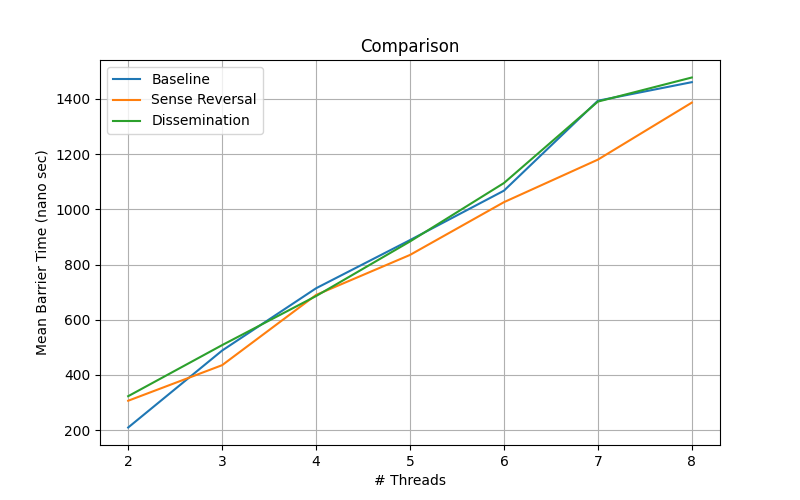

In [11]:
plot_openmp_all()

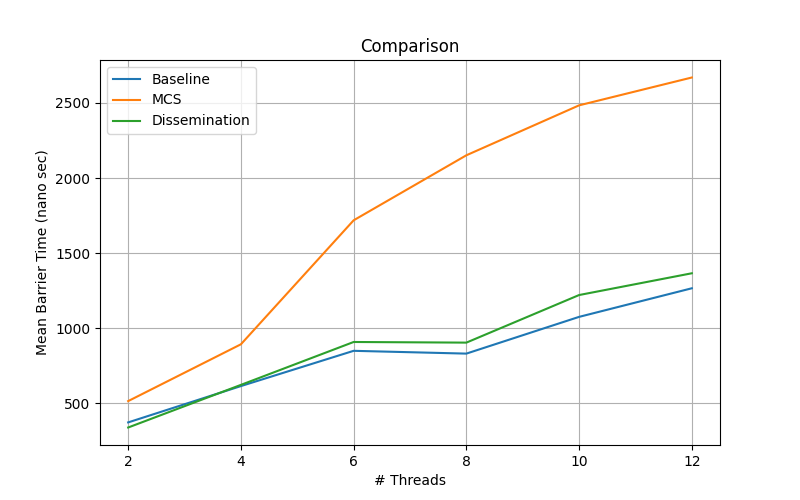

In [12]:
plot_mpi_all()

In [13]:
combined_data = [
    [2, 12, 2690, 3235],
    [2, 10, 2395, 2863],
    [2, 8, 1350, 1894],
    [2, 6, 455, 486],
    [4, 6, 1230, 1405],
    [2, 4, 255, 334],
    [4, 4, 407, 485.4],
    [5, 4, 680, 804],
    [2, 2, 225, 285],
    [4, 2, 280, 424],
    [6, 2, 380, 552],
    [8, 2, 430, 488]
]
combined = pd.DataFrame(combined_data, columns=["Processes", "Threads", "Min Barrier Time", "Mean Barrier Time"]);

In [14]:
def plot_combined_log(column):
    plot = plt.figure()
    plot = plt.axes(projection='3d')
    
    for num_proc in range(2, 11, 2):
        X = combined["Processes"][combined["Processes"] == num_proc]
        Y = combined["Threads"][combined["Processes"] == num_proc]
        Z = np.log(combined[column][combined["Processes"] == num_proc]*10)
        
        plot.scatter3D(X, Y, Z)
    
    plot.set_xlabel('Processes')
    plot.set_ylabel('Threads')
    plot.set_zlabel("Log of" + column + '(nano sec)')
    plt.show()


In [15]:
def plot_combined():
    plot = plt.figure()
    plot = plt.axes(projection='3d')
    
    for num_proc in range(2, 11, 2):
        X = combined["Processes"][combined["Processes"] == num_proc]
        Y = combined["Threads"][combined["Processes"] == num_proc]
        Z = combined[column][combined["Processes"] == num_proc]*10
        
        plot.scatter3D(X, Y, Z)
    
    plot.set_xlabel('Processes')
    plot.set_ylabel('Threads')
    plot.set_zlabel(column + '(nano sec)')
    plt.show()


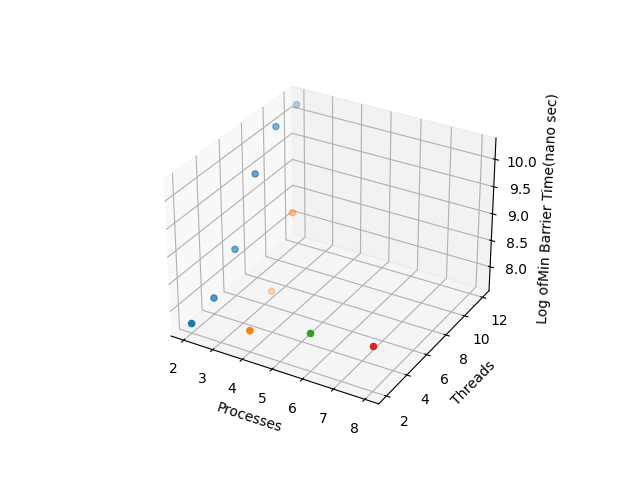

In [16]:
plot_combined_log("Min Barrier Time")

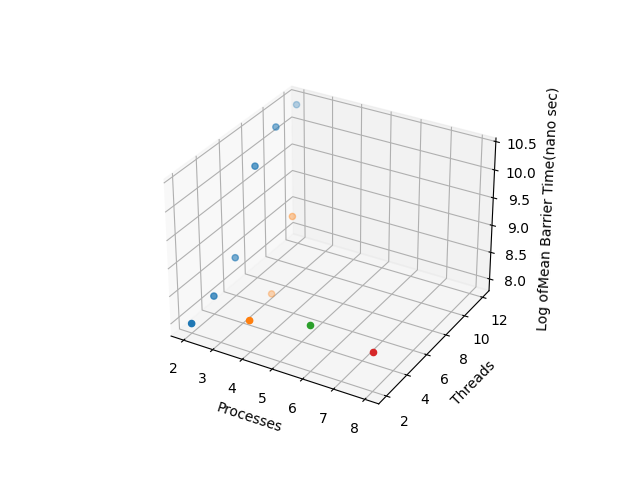

In [17]:
plot_combined_log("Mean Barrier Time")